#### https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/

In [4]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
! wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv 

--2018-10-24 03:23:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
Resolving raw.githubusercontent.com... 151.101.112.133
Connecting to raw.githubusercontent.com|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23278 (23K) [text/plain]
Saving to: ‘pima-indians-diabetes.data.csv.1’

pima-indians-diabet 100%[===================>]  22.73K  27.5KB/s    in 0.8s    

2018-10-24 03:23:59 (27.5 KB/s) - ‘pima-indians-diabetes.data.csv.1’ saved [23278/23278]



In [5]:
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")

In [6]:
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

In [7]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [8]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [10]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


### Feature Importance

In [13]:
print(model.feature_importances_)

[0.07094595 0.1858108  0.08952703 0.08445946 0.07263514 0.16047297
 0.12837838 0.20777027]


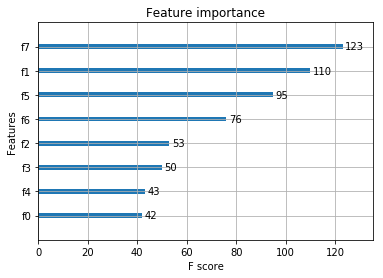

In [17]:
from xgboost import plot_importance
plot_importance(model)


### Hyperparamer Tuning

In [19]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}
